In [1]:
import os
os.chdir('../') # important if this notebook is not in main but in notebooks folder

from gerda.utilities.VPM_plotting import *
from gerda.utilities.VPM_plotting_parallel import *

import sim_parallel.get_status_data_and_plots_from_parallel as plt_para
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

%matplotlib inline
%load_ext autoreload

In [2]:
server_data_folder = 'server_data/V2_RPM02_Gangelt/'
filenames = os.listdir(server_data_folder)

In [3]:
folder='server_data/V2_RPM02_Gangelt/'
prefix = 'V2_RPM02_Gangelt_big_Ifreq_2_'
folders = ['no_mitigation_IF03_infectivity_0.300_ri_1_rx_0',
           'no_mitigation_IF03_infectivity_0.150_ri_1_rx_0',
           'close_all_IF03_disobedience_0.000_ri_1_rx_0',
           'close_all_IF03_disobedience_0.250_ri_1_rx_0',
           'close_all_reopen_all_IF03_start_3_700.000_ri_1_rx_0',
           'close_all_reopen_school_IF03_start_3_700.000_ri_1_rx_0',           
           'close_all_reopen_work_IF03_start_3_700.000_ri_1_rx_0',
           'close_all_reopen_public_IF03_start_3_700.000_ri_1_rx_0']
          #'close_all_reopen_school_IF03_start_3_450.000_5reinfections_at_1000',
          #'close_all_reopen_all_IF03_start_3_750_5_reinfections_at_1000']
          

names = ['Infectivity 0.30',
         'Infectivity 0.15',
         'Lockdown',
         'Non-compliance',
         'Reopen All',         
         'Reopen School',       
         'Reopen Work',
         'Reopen Public']
        #'Reopen School and Reinfection',
        #'Reopen All and Reinfection',]


#names =['Lockdown',
#        'Lockdown, Reopen All',
#        'Lockdown, Reopen Public',
#        'Lockdown, Reopen School',
#        'Lockdown, Reopen Work',
#        'Infectivity 0.3',
#        'Infectivity 0.15',]

scenarios = dict(zip(folders,names))

In [3]:
scenarios

{'no_mitigation_IF03_infectivity_0.300_ri_1_rx_0': 'Infectivity 0.30',
 'no_mitigation_IF03_infectivity_0.150_ri_1_rx_0': 'Infectivity 0.15',
 'close_all_IF03_disobedience_0.000_ri_1_rx_0': 'Lockdown',
 'close_all_IF03_disobedience_0.250_ri_1_rx_0': 'Non-compliance',
 'close_all_reopen_all_IF03_start_3_700.000_ri_1_rx_0': 'Reopen All',
 'close_all_reopen_school_IF03_start_3_700.000_ri_1_rx_0': 'Reopen School',
 'close_all_reopen_work_IF03_start_3_700.000_ri_1_rx_0': 'Reopen Work',
 'close_all_reopen_public_IF03_start_3_700.000_ri_1_rx_0': 'Reopen Public'}

def plot_stat_para(ax, folder_scenerario):
    for stat in ['S','I','R','D']:
        df_stat = pd.read_csv('server_data/outputs/'+folder_scenerario+'/'+folder_scenerario+'_'+stat+'.csv')
        df_stat.drop('time',axis=1,inplace=True)
        df_stat.plot(legend=False,alpha=0.1, c=statusAndFlagsColors[stat], ax=ax)
    ax.set_ylabel('People')
    ax.set_xlabel('Time, [hours]')
    

def plot_stat_para(ax, folder_scenario, statii=['S','I','R','D'], log=False):
    for stat in statii:
        df_stat = pd.read_csv(server_data_folder+folder_scenario+'/'+folder_scenario[:-10]+'_'+stat+'.csv')
        df_stat.drop('time',axis=1,inplace=True)
        if not stat.startswith('c'):
            df_stat.plot(legend=False,alpha=0.1, c=statusAndFlagsColors[stat], ax=ax)
        else:
            df_stat.plot(legend=False,alpha=0.1, c=statusAndFlagsColors[stat[10:]], ax=ax)
    ax.set_ylabel('People')
    ax.set_xlabel('Time [hours]')
    if log:
        ax.set_yscale('log')

def plot_stat_para_mean(ax, folder_scenario, statii=['S','I','R','D'], log=False, alpha=0.1, label=False, ci=False):
    for stat in statii:
        df_stat = pd.read_csv(server_data_folder+folder_scenario+'/'+folder_scenario+'_'+stat+'.csv')
        df_stat.drop('time',axis=1,inplace=True)
        if not label:
            label = folder_scenario
        if not stat.startswith('c'):
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat], ax=ax, label=label)
        else:
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat[10:]], ax=ax, label=label)
    ax.set_ylabel('People')
    ax.set_xlabel('Time [hours]')
    if log:
        ax.set_yscale('log')
        

#### plot fig3

['no_mitigation_IF03_infectivity_0.300_ri_1_rx_0', 'no_mitigation_IF03_infectivity_0.150_ri_1_rx_0', 'close_all_IF03_disobedience_0.000_ri_1_rx_0', 'close_all_IF03_disobedience_0.250_ri_1_rx_0', 'close_all_reopen_all_IF03_start_3_700.000_ri_1_rx_0', 'close_all_reopen_school_IF03_start_3_700.000_ri_1_rx_0', 'close_all_reopen_work_IF03_start_3_700.000_ri_1_rx_0', 'close_all_reopen_public_IF03_start_3_700.000_ri_1_rx_0']


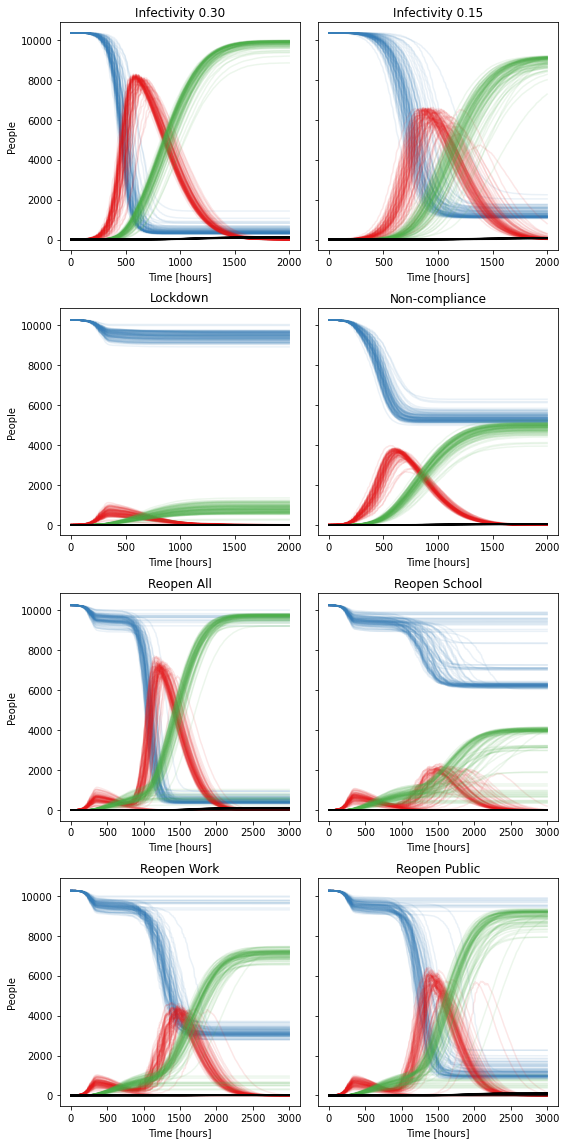

In [4]:
fig, axes = plt.subplots(4,2,figsize=(8,16), sharey=True, sharex=False) # transponiert für math + vortrag

for n,folder_scenario in enumerate(folders):
    row = int(n/2)
    col = n%2
    ax1=axes[row][col]
    plot_stat_para(ax1, prefix + folder_scenario, server_data_folder)
    ax1.set_title(scenarios[folder_scenario])
plt.tight_layout()
plt.savefig('plots/fig3.png') # or svg 
print(folders)

In [67]:
def plot_stat_para_mean_ci(ax, folder_scenario, statii=['S','I','R','D'], log=False, alpha=0.1, label=False):
    for stat in statii:
        df_stat = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_'+stat+'.csv')
        df_stat.drop('time',axis=1,inplace=True)
        if not label:
            label = folder_scenario
        if not stat.startswith('c'):
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat], ax=ax, label=label)
            df_stat.std(axis=1)
        else:
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat[10:]], ax=ax, label=label)
    ax.set_ylabel('People')
    ax.set_xlabel('Time [hours]')
    if log:
        ax.set_yscale('log')
#ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.05)

In [7]:
def get_df_total_status(files_folder, server_data_folder, status = 'I', digits=5, time_loc=-1):
    """:returns: DataFrame with status at each t-1 for each repetition and each parameter"""    
    if status == 'I':
        stat = 'cumulativ_WasInfected'
    else:
        stat = status
    files_dict={}
    for folder_scenario in  files_folder:
        try:
            df = pd.read_csv(server_data_folder+ folder_scenario+'/'+folder_scenario+'_'+stat+'.csv')
        except:
            df = pd.read_csv(server_data_folder+ folder_scenario+'/'+folder_scenario[:-10]+'_'+stat+'.csv')        
        df.drop('time',axis=1,inplace=True)
        param_value = float(folder_scenario.split('_')[-digits])
        files_dict[param_value] = df.iloc[time_loc].values
    return pd.DataFrame(files_dict)


#### disobedience

In [5]:
disob_folders = [x for  x in filenames if 'disobedience' in x.split('_')]

In [8]:
df_disob=get_df_total_status(disob_folders, server_data_folder)

disob={}
for folder_scenario in  disob_folders:
    try:
        df = pd.read_csv(server_data_folder+ folder_scenario+'/'+folder_scenario+'_cumulativ_WasInfected.csv')
    except:
        df = pd.read_csv(server_data_folder+ folder_scenario+'/'+folder_scenario[:-10]+'_cumulativ_WasInfected.csv')        
    df.drop('time',axis=1,inplace=True)
    disob[float(folder_scenario[-15:-10])] =df.iloc[-1].values
df_disob = pd.DataFrame(disob)

(0.0, 10000.0)

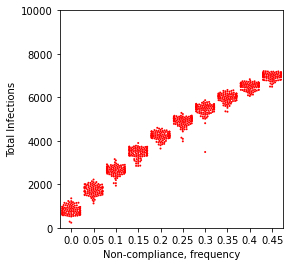

In [11]:
col1 = list(df_disob.keys())
col1.sort()
#df_disob.violin(column = d)
plt.figure(figsize=(4,4))
sns.swarmplot(data = df_disob[col1], color='r', size=2)
plt.ylabel('Total Infections')
plt.xlabel('Non-compliance, frequency')
plt.savefig('plots/non_compliant.svg')
plt.ylim(0,10000)


### infectivity

In [12]:
inf_folders = [x for  x in filenames if 'infectivity' in x]

In [14]:
df_inf=get_df_total_status(inf_folders, server_data_folder)

[Text(0, 0, '0.05'),
 Text(1, 0, ''),
 Text(2, 0, '0.15'),
 Text(3, 0, ''),
 Text(4, 0, '0.25'),
 Text(5, 0, ''),
 Text(6, 0, '0.35'),
 Text(7, 0, ''),
 Text(8, 0, '0.45'),
 Text(9, 0, '')]

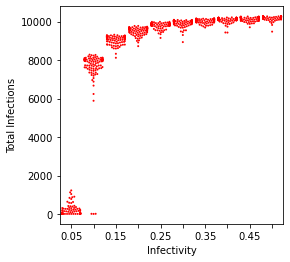

In [51]:
col2 = list(df_inf.keys())
col2.sort()
plt.figure(figsize=(4,4))
sns.swarmplot(data = df_inf[col2], color='r', size=2)
plt.ylabel('Total Infections')
plt.xlabel('Infectivity')
plt.savefig('plots/infectivity.png')
ax = plt.gca() 
ax.set_xticklabels([float(x) if col2.index(x)%2==0 else None for x in col2])

In [49]:
 for x in col2

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

### close all at t

In [16]:
close_folders = [x for  x in filenames if x.split('_').count('2') == 2 ]

In [17]:
df_close_all_D = get_df_total_status(close_folders, server_data_folder, status='D', digits=5)
df_close_all_I = get_df_total_status(close_folders, server_data_folder, status='I', digits=5)

[Text(0, 0, '100'),
 Text(0, 0, ''),
 Text(0, 0, '200'),
 Text(0, 0, ''),
 Text(0, 0, '300'),
 Text(0, 0, ''),
 Text(0, 0, '400'),
 Text(0, 0, ''),
 Text(0, 0, '500'),
 Text(0, 0, '')]

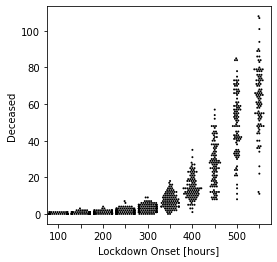

In [18]:
col3 = list(df_close_all_D.keys())
col3.sort()
plt.figure(figsize=(4,4))
sns.swarmplot(data = df_close_all_D[col3], color='k', size=2)
plt.ylabel('Deceased')
plt.xlabel('Lockdown Onset [hours]')
ax=plt.gca()
ax.set_xticklabels([int(x) if col3.index(x)%2==0 else None for x in col3])
#plt.savefig('Lockdown_Time_Death.svg')

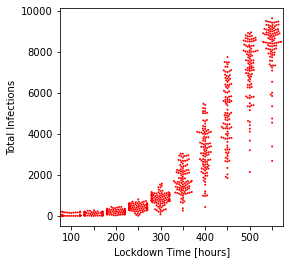

In [19]:
col3 = list(df_close_all_I.keys())
col3.sort()
plt.figure(figsize=(4,4))
sns.swarmplot(data = df_close_all_I[col3], color='r', size=2)
plt.ylabel('Total Infections')
plt.xlabel('Lockdown Time [hours]')
ax=plt.gca()
ax.set_xticklabels([int(x) if col3.index(x)%2==0 else None for x in col3])
plt.savefig('plots/Lockdown_Time_Death.png')

### reopen

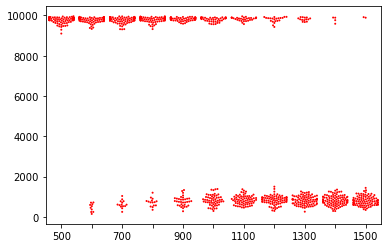

<Figure size 288x288 with 0 Axes>

In [41]:


def plot_total_infections_scan(ax,scenario_name,foldername, status='I', color ='r', size=2):
    scan_folders = [x for x in filenames if x.startswith(scenario_name[:-20])]
    df_reopen_all = get_df_total_status(scan_folders, server_data_folder, status=status)
    
    col = list(df_reopen_all.keys())
    col.sort()
    plt.figure(figsize=(4,4))
    sns.swarmplot(data = df_reopen_all[col], color='r', size=2, ax=ax)
    ax.set_xticklabels([int(x) if col.index(x)%2==0 else None for x in col])
    return ax 
   
    
plot_total_infections_scan(ax, 'V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_start_3_1300.000_ri_1_rx_0', server_data_folder)

In [20]:
reopen_all_folders = [x for x in filenames if x.startswith('V2_RPM02_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_start_3_')]

reopen_all={}
for folder_scenario in  reopen_all_folders:
    df = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_cumulativ_WasInfected.csv')
    df.drop('time',axis=1,inplace=True)
    reopen_all[float(folder_scenario[-7:])] =df.iloc[-1].values
df_reopen_all = pd.DataFrame(reopen_all)

In [53]:
df_reopen_all = get_df_total_status(reopen_all_folders, server_data_folder, status='I')

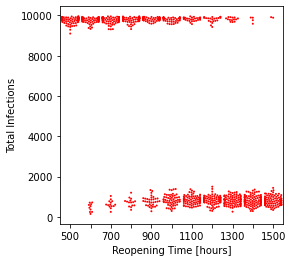

In [54]:
col4 = list(df_reopen_all.keys())
col4.sort()
plt.figure(figsize=(4,4))
sns.swarmplot(data = df_reopen_all[col4], color='r', size=2)
plt.ylabel('Total Infections')
plt.xlabel('Reopening Time [hours]')
ax = plt.gca()
ax.set_xticklabels([int(x) if col4.index(x)%2==0 else None for x in col4])
plt.savefig('plots/Reopening_Time.png', bbox_inches='tight')

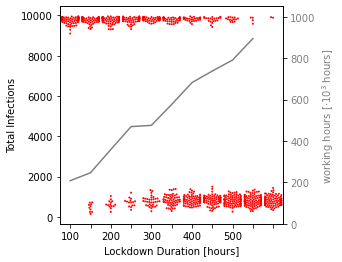

In [25]:
plt.figure(figsize=(4,4))
ax1 = plt.axes()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_ylabel('Total Infections')  # we already handled the x-label with ax1
sns.swarmplot(data = df_reopen_all[col4], color='r', size=2, ax=ax1)


df_work = pd.read_csv('outputs/work_hours.csv')
ax2.plot(list(range(10)),df_work['Work Hours']/1000, label='working hours', color='gray')
#plt.legend(frameon=False)
ax2.tick_params(axis='y', labelcolor='gray')
ax2.set_ylim(0,1050)
ax2.set_ylabel('working hours [$\cdot 10^3$ hours]', color='gray')
ticks=ax1.get_xticks()
loc_dur = list(df_work['Lockdown Duration'].values)
ax2.set_xticklabels([int(x) if loc_dur.index(x)%2==0 else None for x in loc_dur])
ax1.set_xlabel('Lockdown Duration [hours]')
plt.savefig('inf_working_hours.png',bbox_inches='tight')


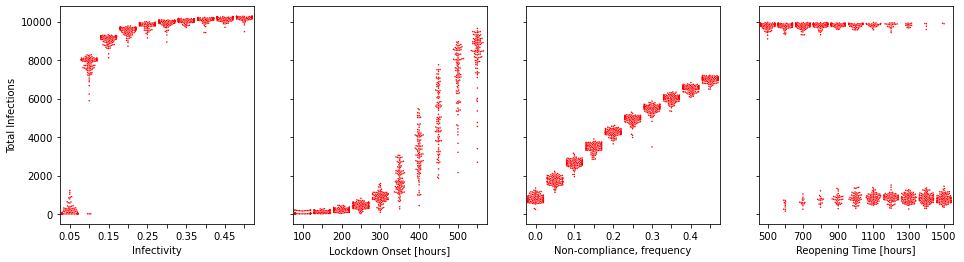

In [52]:
fig, axes = plt.subplots(1,4,figsize=(16,4), sharey=True)
size = 1.5
color = 'r'
sns.swarmplot(data = df_reopen_all[col4], color=color, size=size, ax=axes[3])
axes[3].set_xlabel('Reopening Time [hours]')
axes[3].set_xticklabels([int(x) if col4.index(x)%2==0 else None for x in col4])

sns.swarmplot(data = df_close_all_I[col3], color=color, size=size, ax=axes[1])
axes[1].set_xlabel('Lockdown Onset [hours]')
axes[1].set_xticklabels([int(x) if col3.index(x)%2==0 else None for x in col3])

sns.swarmplot(data = df_inf[col2], color=color, size=size, ax=axes[0])
axes[0].set_ylabel('Total Infections')
axes[0].set_xlabel('Infectivity')
axes[0].set_xticklabels([x if col2.index(x)%2==0 else None for x in col2])

sns.swarmplot(data = df_disob[col1], color=color, size=size, ax=axes[2])
axes[2].set_xlabel('Non-compliance, frequency')
axes[2].set_xticklabels([x if col1.index(x)%2==0 else None for x in col1])
#axes[2].xaxis.set_major_locator(plt.MaxNLocator(5))
#axes[2].set_xticklabels([x for x in col2 if col2.index(x)%2==1])

plt.savefig('plots/para_results.svg')

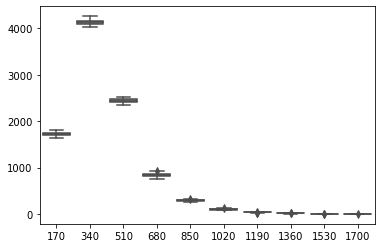

In [406]:
df_dur = pd.read_csv('server_data/outputs/'+'no_mitigation_if03'+'/'+'no_mitigation_if03' + '_' + dur_list[0]  + '.csv')
df_dur.drop('Unnamed: 0',axis=1, inplace=True)
df_dur.columns =[int(float(x)) for x in list(df_dur.columns)]
sns.boxplot(data=df_dur, color='gray')#,size=2)

#### herd immunity

In [134]:
random_recovery = [x for  x in filenames if '_rw_0' in x]
df_random_recovery_I = get_df_total_status(random_recovery,status='I', digits=7)
df_random_recovery_I_1 = get_df_total_status(random_recovery,status='I', digits=7, time_loc=1)
df_random_recovery_I_2 = get_df_total_status(random_recovery,status='I', digits=7, time_loc=-1)
df_delta_I_rnd = df_random_recovery_I_2-df_random_recovery_I_1

In [96]:
df_random_recovery_S_1 = get_df_total_status(random_recovery,status='S', digits=7, time_loc=1)
df_random_recovery_S_2 = get_df_total_status(random_recovery,status='S', digits=7, time_loc=-1)
df_delta_S = df_random_recovery_S_1-df_random_recovery_S_2

[Text(0, 0, '0.5'),
 Text(0, 0, ''),
 Text(0, 0, '0.58'),
 Text(0, 0, ''),
 Text(0, 0, '0.66'),
 Text(0, 0, ''),
 Text(0, 0, '0.74'),
 Text(0, 0, ''),
 Text(0, 0, '0.82'),
 Text(0, 0, ''),
 Text(0, 0, '0.9')]

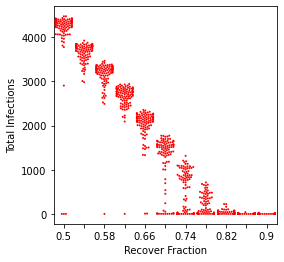

In [132]:
col = list(df_delta_S.keys())
col.sort()
plt.figure(figsize=(4,4))
sns.swarmplot(data = df_delta_I_rnd[col], color='red', size=2)
plt.ylabel('Total Infections')
plt.xlabel('Recover Fraction')
ax = plt.gca()
ax.set_xticklabels([x if col.index(x)%2==0 else None for x in col])

In [137]:
network_recovery = [x for  x in filenames if '_rw_1' in x]
df_network_recovery_I = get_df_total_status(network_recovery,status='I', digits=7)
df_network_recovery_I_1 = get_df_total_status(network_recovery,status='I', digits=7, time_loc=1)
df_network_recovery_I_2 = get_df_total_status(network_recovery,status='I', digits=7, time_loc=-1)
df_delta_I_nw = df_network_recovery_I_2-df_network_recovery_I_1


In [209]:
df_network_recovery_S_1 = get_df_total_status(network_recovery,status='S', digits=7, time_loc=1)
df_network_recovery_S_2 = get_df_total_status(network_recovery,status='S', digits=7, time_loc=-1)
df_delta_S_nw = df_network_recovery_S_1-df_network_recovery_S_2

In [210]:
df_network_recovery_R_0 = get_df_total_status(network_recovery,status='R', digits=7, time_loc=1)
df_random_recovery_R_0 = get_df_total_status(random_recovery,status='R', digits=7, time_loc=1)
#df_delta_S_nw = df_network_recovery_S_1-df_network_recovery_S_2

[Text(0, 0, '0.5'),
 Text(0, 0, ''),
 Text(0, 0, '0.58'),
 Text(0, 0, ''),
 Text(0, 0, '0.66'),
 Text(0, 0, ''),
 Text(0, 0, '0.74'),
 Text(0, 0, ''),
 Text(0, 0, '0.82'),
 Text(0, 0, ''),
 Text(0, 0, '0.9')]

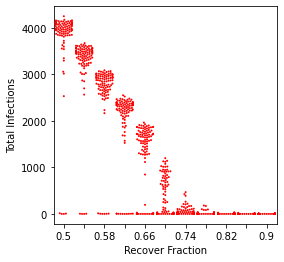

In [138]:
col = list(df_delta_S_nw.keys())
col.sort()
plt.figure(figsize=(4,4))
sns.swarmplot(data = df_delta_I_nw[col], color='red', size=2)
plt.ylabel('Total Infections')
plt.xlabel('Recover Fraction')
ax = plt.gca()
ax.set_xticklabels([x if col.index(x)%2==0 else None for x in col])

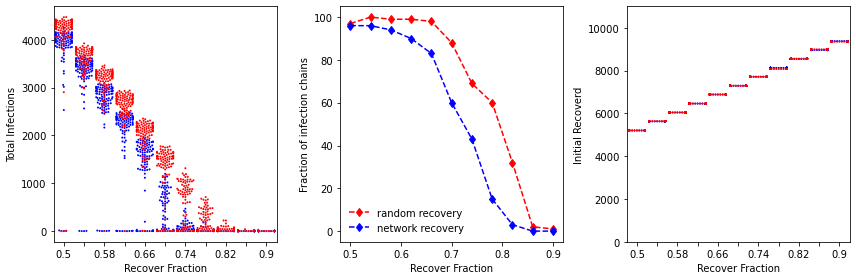

In [218]:
col = list(df_delta_S.keys())
col.sort()
fig, axes = plt.subplots(1,3,figsize=(12,4))

ax1= axes[0]
ax2= axes[1]
ax3= axes[2]
sns.swarmplot(data = df_delta_I_nw[col], color='blue', size=2, ax=ax1, label= 'nework_recovery')
sns.swarmplot(data = df_delta_I_rnd[col], color='red', size=2, ax=ax1, label= 'random_recovery')
ax1.set_ylabel('Total Infections')
ax1.set_xlabel('Recover Fraction')
ax1.set_xticklabels([x if col.index(x)%2==0 else None for x in col])
#ax.get_legend(labels=['nework_recovery']+['_']*len(col))
#ax1.legend(labels=['nework_recovery']+['_a']*len(col)+['random_recovery']+['_a']*len(col), markerscale=3, frameon=False)


###########
cutoff=20
df_nw_I_new=df_delta_I_nw[df_delta_I_nw>cutoff]
df_nw = df_nw_I_new.count().sort_index()
df_rnd_I_new=df_delta_I_rnd[df_delta_I_rnd>cutoff]
df_rnd=df_rnd_I_new.count().sort_index()
## plot

ax2.plot(df_rnd ,'--d', label='random recovery', color='red')
ax2.plot(df_nw ,'--d', label='network recovery', color='blue')
ax2.set_ylabel('Fraction of infection chains')
ax2.set_xlabel('Recover Fraction')
ax2.legend(markerscale=1, frameon=False)
#######


sns.swarmplot(data = df_network_recovery_R_0[col], color='blue', size=2, ax=ax3, label= 'nework_recovery')
sns.swarmplot(data = df_random_recovery_R_0[col], color='red', size=2, ax=ax3, label= 'random_recovery')
ax3.set_xticklabels([x if col.index(x)%2==0 else None for x in col])
ax3.set_ylabel('Initial Recoverd')
ax3.set_xlabel('Recover Fraction')
ax3.set_ylim(0,11000)

plt.tight_layout()
plt.savefig('plots/recover_frac.png')

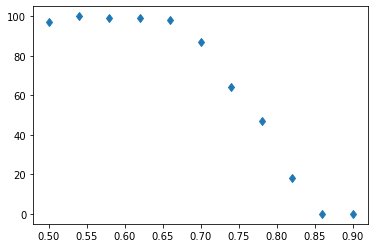

In [183]:
cutoff=50
df_nw_I_new=df_delta_I_nw[df_delta_I_nw>cutoff]
df_nw = df_nw_I_new.count().sort_index()
df_rnd_I_new=df_delta_I_rnd[df_delta_I_rnd>cutoff]
df_r=df_rnd_I_new.count().sort_index()
df_r.columns=['Refraction','Ratio']
plt.plot(df_r ,'d', label='random recovery')

In [76]:
os.listdir(folder+ network_recovery[0]+'/')
pd.read_csv(folder+ network_recovery[0]+'/' + 'sim_parameters.csv')

,run,0
0,max_time,3000
1,start_2,200
2,start_3,500
3,closed_locs,[]
4,reopen_locs,[]
5,infectivity,0.3
6,name,no_mitigation_IF03
7,scenario_type,13
8,cores,45
9,number,100


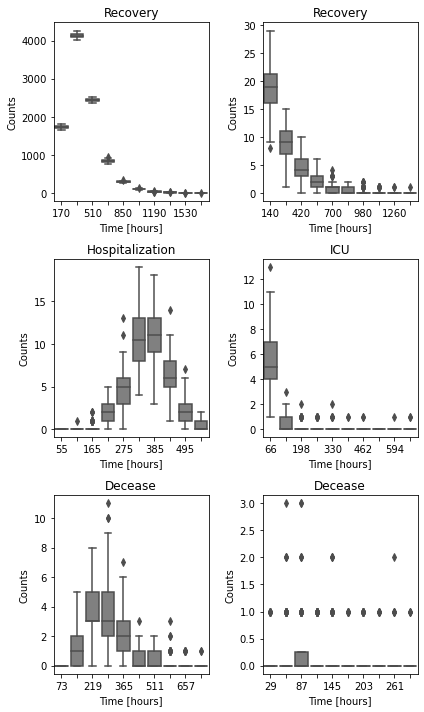

In [427]:
dur_list = ['infection_to_recovery', 'infection_to_hospital', 'infection_to_death', 'hospital_to_recovery', 'hospital_to_icu', 'hospital_to_death']
dur_titels = ['Recovery', 'Hospitalization', 'Decease', 'Recovery', 'ICU', 'Decease']

dur_dict = dict(zip(dur_list, dur_titels))
fig, axes = plt.subplots(3,2, figsize=(6,10))

plt.subplots
for k,dur in enumerate(dur_list):
    col = k%3
    row = int(k/3)
    ax=axes[col][row]
    df_dur = pd.read_csv('server_data/outputs/'+'no_mitigation_if03'+'/'+'no_mitigation_if03' + '_' + dur + '.csv')
    df_dur.drop('Unnamed: 0',axis=1, inplace=True)
    df_dur.columns =[int(float(x)) for x in list(df_dur.columns)]
    sns.boxplot(data=df_dur, color='gray',ax=ax)#size=2,
    ax.set_xticklabels([x if list(df_dur.columns).index(x)%2==0 else None for x in df_dur.columns])
    ax.set_xlabel('Time [hours]')
    ax.set_ylabel('Counts')
    ax.set_title(dur_dict[dur])
    
plt.tight_layout()
plt.savefig('../fig2/durations.svg')

no_mitigation_infectivity_0.300


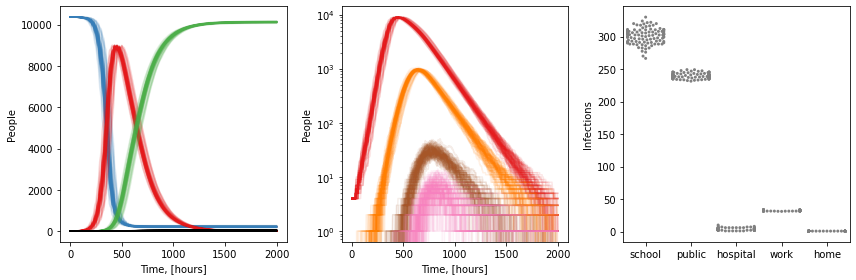

In [418]:
print(folders[1])

folder1 = 'no_mitigation_IF_030'
flags = ['IsInfected','Hospitalized','Diagnosed','ICUed']

fig, axes = plt.subplots(1,3, figsize=(12,4))
ax=axes[0]
plot_stat_para(ax, folders[1])
ax=axes[1]
plot_stat_para(ax, folders[1],statii=flags, log=True)

ax=axes[2]
df_loc_stat = pd.read_csv('server_data/outputs/'+folder1+'/'+folder1+'_infections_per_location_type.csv')
df_loc_stat.drop('Unnamed: 0',axis=1, inplace=True)
sns.swarmplot(data=df_loc_stat, color='gray', ax=ax, size=3)
ax.set_ylabel('Infections')
plt.tight_layout()

plt.savefig('../fig2/fig2_stats.svg')
#df_stat = pd.read_csv('server_data/outputs/'+folders[1]+'/'+folders[1]+'_'+flags[0]+'.csv')
#df_stat.drop('time',axis=1,inplace=True)
#df_stat.plot(ax=axes[1],c=statusAndFlagsColors[flags[0]],legend=False)

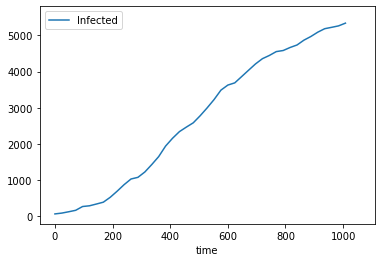

In [4]:
import pandas as pd 
df_data = pd.read_csv('COVID_Daily.csv')

df_data.reset_index(inplace=True)
df_data['time']=df_data['index']*24
df_data.plot(x='time',y='Infected')

In [6]:
def plot_stat_para_mean_ci(ax, folder_scenario, statii=['S','I','R','D'], log=False, alpha=0.1, label=False):
    for stat in statii:
        df_stat = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_'+stat+'.csv')
        df_stat.drop('time',axis=1,inplace=True)
        if not label:
            label = folder_scenario
        if not stat.startswith('c'):
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat], ax=ax, label=label)
            ax.plot(df_stat)df_stat.std(axis=1)
        else:
            df_stat.mean(axis=1).plot(alpha=alpha, c=statusAndFlagsColors[stat[10:]], ax=ax, label=label)
    ax.set_ylabel('People')
    ax.set_xlabel('Time [hours]')
    if log:
        ax.set_yscale('log')
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.05)

SyntaxError: invalid syntax (<ipython-input-6-0dd2e242fd3b>, line 9)

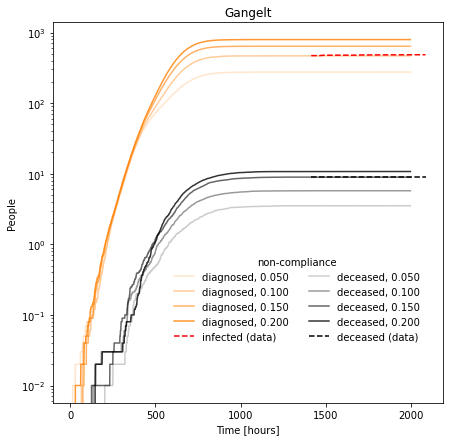

In [9]:
file = 'close_all_IF03_disobedience_0.100'
files = ['close_all_IF03_disobedience_0.050','close_all_IF03_disobedience_0.100','close_all_IF03_disobedience_0.150', 'close_all_IF03_disobedience_0.200']

df_data = pd.read_csv('COVID_Daily_gangelt.csv')
df_data.reset_index(inplace=True)
df_data['Time']=(df_data['time']+59)*24

fig, axes = plt.subplots(1,1, figsize=(7,7), sharey=True, sharex=True)

for k,file in enumerate(files):
    plot_stat_para_mean(axes,file, statii=['cumulativ_WasDiagnosed'], alpha=0.2*(k+1), label = 'diagnosed, '+file[-5:])
axes.plot(df_data['Time'], df_data['Infected'],'r--', label ='infected (data)')

for k,file in enumerate(files):
    plot_stat_para_mean(axes,file, statii=['D'], alpha=0.2*(k+1), label = 'deceased, '+file[-5:])

axes.plot(df_data['Time'], df_data['Dead'],'k--', label = 'deceased (data)')

#df_data.plot(x='time',y=['Infected'], ax=axes, logy=True, color='r')
#df_data.plot(x='time',y=['Dead'], ax=axes, logy=True, color='k')


axes.set_yscale('log')
axes.set_title('Gangelt')
axes.legend(loc=(0.3,0.15), frameon=False, ncol=2, title='non-compliance')
#plt.savefig('Gangelt_data.svg')



In [34]:
df_data

,index,Date,Infected,Recovered,Dead,Sick,time,Time
0,0,24.04.20,471,407,9,55.0,0,1416
1,1,25.04.20,471,407,9,55.0,1,1440
2,2,26.04.20,471,407,9,55.0,2,1464
3,3,27.04.20,477,427,9,41.0,3,1488
4,4,28.04.20,477,438,9,30.0,4,1512
5,5,29.04.20,477,438,9,30.0,5,1536
6,6,30.04.20,478,446,9,23.0,6,1560
7,7,01.05.20,478,446,9,23.0,7,1584
8,8,02.05.20,478,446,9,23.0,8,1608
9,9,03.05.20,478,446,9,23.0,9,1632


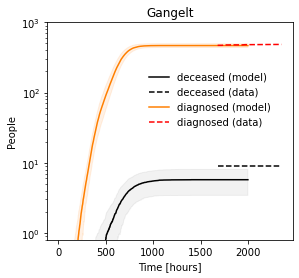

In [14]:
fig, ax = plt.subplots(1,1, figsize=(4.4,4), sharey=True, sharex=True)


folder_scenario = 'close_all_IF03_disobedience_0.100'
df_data = pd.read_csv('COVID_Daily_gangelt.csv')

stat = 'D'
df_stat = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_'+stat+'.csv')
df_stat.drop('time',axis=1,inplace=True)
df_stat.mean(axis=1).plot(alpha=1, c=statusAndFlagsColors[stat], ax=ax, label='deceased (model)')

std = df_stat.std(axis=1).values
mean = df_stat.mean(axis=1).values
df_data['Time']=(df_data['time']+70)*24
ax.fill_between(df_stat.index.values, (mean-std), (mean+std), color='gray', alpha=.1)
ax.plot(df_data['Time'], df_data['Dead'],'k--', label = 'deceased (data)')

###########

stat = 'cumulativ_WasDiagnosed'
df_stat = pd.read_csv('server_data/outputs/'+folder_scenario+'/'+folder_scenario+'_'+stat +'.csv')
df_stat.drop('time',axis=1,inplace=True)
df_stat.mean(axis=1).plot(alpha=1, c=statusAndFlagsColors[stat[10:]], ax=ax, label='diagnosed (model)')

std = df_stat.std(axis=1).values
mean = df_stat.mean(axis=1).values
df_stat['Time']=(df_data['time']+70)*24
ax.fill_between(df_stat.index.values, (mean-std), (mean+std), color=statusAndFlagsColors[stat[10:]], alpha=.1)
ax.plot(df_data['Time'], df_data['Infected'],'r--', label ='diagnosed (data)')

ax.set_yscale('log')
ax.set_title('Gangelt')
ax.legend(loc=(0.4,0.50), frameon=False)
ax.set_ylabel('People')
ax.set_xlabel('Time [hours]')
ax.set_ylim(0.8,1000)
plt.savefig('Gangelt_data_non_c01.svg')




In [247]:
df_stat[df_stat['WasDiagnosed']>7]

,time,IsInfected,Diagnosed,Hospitalized,ICUed,WasInfected,WasDiagnosed,WasHospitalized,WasICUed
293,293,1374,8,0,0,1419,8,0,0
294,294,1384,8,0,0,1430,8,0,0
295,295,1389,9,0,0,1436,9,0,0
296,296,1391,9,0,0,1439,9,0,0
297,297,1396,9,0,0,1444,9,0,0
...,...,...,...,...,...,...,...,...,...
1995,1995,2,1,0,1,7226,1251,51,0
1996,1996,2,1,0,1,7226,1251,51,0
1997,1997,2,1,0,1,7226,1251,51,0
1998,1998,2,1,0,1,7226,1251,51,0


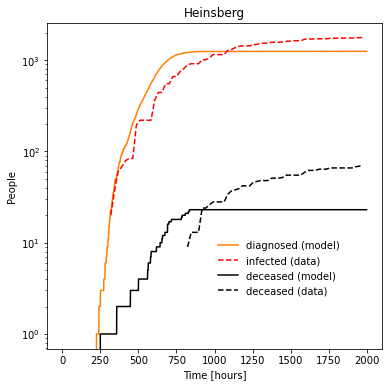

In [251]:
df_stat = pd.read_csv('server_data/heinsberg/HeinsbergFlags.csv')
df_stat_D = pd.read_csv('server_data/heinsberg/HeinsbergDs.csv')
df_data = pd.read_csv('COVID_Daily_heinsberg.csv')
df_data.reset_index(inplace=True)
df_data['Time']=(df_data.index.values+1)*24+295

fig, ax = plt.subplots(1,1, figsize=(6,6), sharey=True, sharex=True)

df_stat.plot(y='WasDiagnosed', color=statusAndFlagsColors['WasDiagnosed'],
             label='diagnosed (model)', ax =ax)
#df_data.plot(x='Time', y='Infected', ax=ax, c='--r', label='infected (data)')
ax.plot(df_data['Time'],df_data['Infected'], '--r',label='infected (data)')

ax.set_yscale('log')

df_stat_D.plot(y='D', color=statusAndFlagsColors['D'],
             label='deceased (model)', ax =ax)
#df_data.plot(x='Time', y='Dead', ax=ax, c='--k', label='deceased (data)')
ax.plot(df_data['Time'],df_data['Dead'], '--k',label='deceased (data)')
ax.set_yscale('log')
ax.set_title('Heinsberg')
ax.legend(loc=(0.5,0.15), frameon=False)
ax.set_ylabel('People')
ax.set_xlabel('Time [hours]')
plt.savefig('Heinsberg_data_non_c01.svg')

In [218]:
df_data

,index,Date,Infected,Recovered,Dead,Sick,Time
0,0,27.02.20,20.0,NaN,NaN,20,1416
1,1,28.02.20,37.0,NaN,NaN,37,1440
2,2,29.02.20,60.0,NaN,NaN,60,1464
3,3,01.03.20,68.0,NaN,NaN,68,1488
4,4,02.03.20,79.0,NaN,NaN,79,1512
...,...,...,...,...,...,...,...
168,168,NaN,NaN,NaN,NaN,0,5448
169,169,NaN,NaN,NaN,NaN,0,5472
170,170,NaN,NaN,NaN,NaN,0,5496
171,171,NaN,NaN,NaN,NaN,0,5520


NameError: name 'x' is not defined

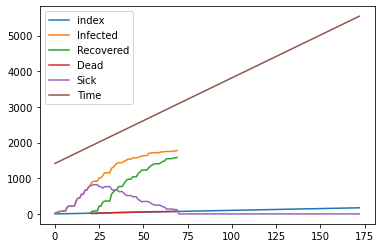

In [213]:
df_data.plot()


ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

### plot ratios changes for schedules and locations

In [220]:
def get_ratio_df(df_data, df_world, relative=True):
    ### data processing
    df_world_m = df_world.mean()
    df_data_m = df_data.mean()
    df_series = df_data_m-df_world_m
    if relative:
        df_series = df_series/df_world_m
    else:
        pass
    df = df_series.to_frame('values')
    df['positive'] = df>0
    df.sort_index(inplace=True)
    return df

In [221]:
def plot_ratio_change(df, cmap_= 'Set1',
                      ax=None,
                      label_offset= 0.09,
                      title = 'Title',
                      save_fig=True,
                      output_folder='plots/',
                      ):
    """
    plot the change between two input Dataframes as bar plot without grid 
    :return: axes of plot
    """
    ###figure
    cmap = plt.get_cmap(cmap_)
    colors = cmap(np.arange(0,3))
    if not ax:
        fig,ax = plt.subplots(1,1, figsize=(5,4))
    ##plot
    df['values'].plot(kind='bar', color=df['positive'].map({True: colors[0], False: colors[1]}),ax=ax)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    ax.tick_params(axis='x',direction='out', pad=100, labelrotation=90)
    #ax.set_yticks([])
    ax.set_ylim(df['values'].min() * 1.4-0.1,df['values'].max() * 1.5+0.1)
    ax.xaxis.set_ticks_position('none') 
    ax.set_title(title,pad=30)

    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate('{:.0%}'.format(p.get_height()), (p.get_x(), p.get_height() * 1.02 + label_offset))
        else:
            ax.annotate('{:.0%}'.format(p.get_height()), (p.get_x(), p.get_height() * 1.02 - label_offset*2))

    if save_fig:
        plt.savefig(output_folder + 'contribution_per_schedule_type.png', bbox_inches='tight')
    return ax   